In [1]:
import image_anomaly_detection as iad
import torch
from torch.utils.data import DataLoader


In [2]:
class_name = 'bottle'
data_path = '../../data/mvtec_dataset/' 
test_dataset = iad.MVTecDataset(data_path, class_name, is_train=False)
test_dataloader = DataLoader(test_dataset, batch_size=32, pin_memory=True)
print("Number of images in dataset:", len(test_dataloader.dataset))

Number of images in dataset: 83


In [3]:
distributions_path = '../distributions/'
embedding_coreset = torch.load(distributions_path+'bottle_embedding_coreset.pt')

In [4]:
model = iad.PatchCore('resnet18', embedding_coreset=embedding_coreset)

In [5]:
res = model.evaluate(test_dataloader)
images, image_classifications_target, masks_target, image_scores, score_maps = res

Inference:   0%|          | 0/3 [00:00<?, ?it/s]/home/plejd/anaconda3/envs/vision/lib/python3.7/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
Inference: 100%|██████████| 3/3 [00:10<00:00,  3.65s/it]


Image level
ROC-AUC score: 1.0

Optimal thresh: 1.9453496
Recall: 1.0
Precision: 1.0


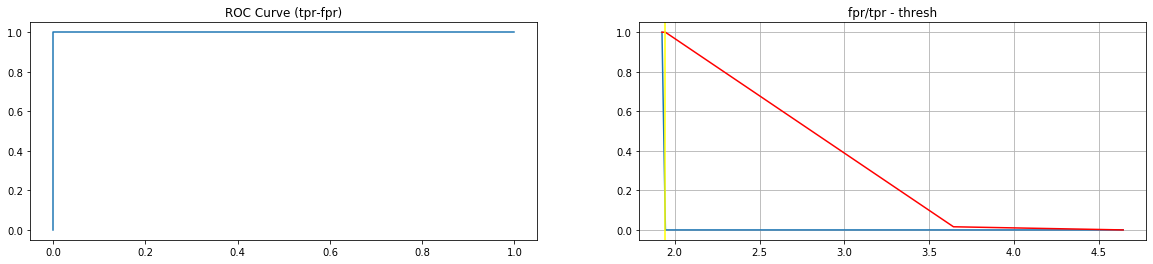

Pixel level
ROC-AUC score: 0.9763643500852652

Optimal thresh: 2.3058295
Recall: 0.7587989704944431
Precision: 0.5822917064399791


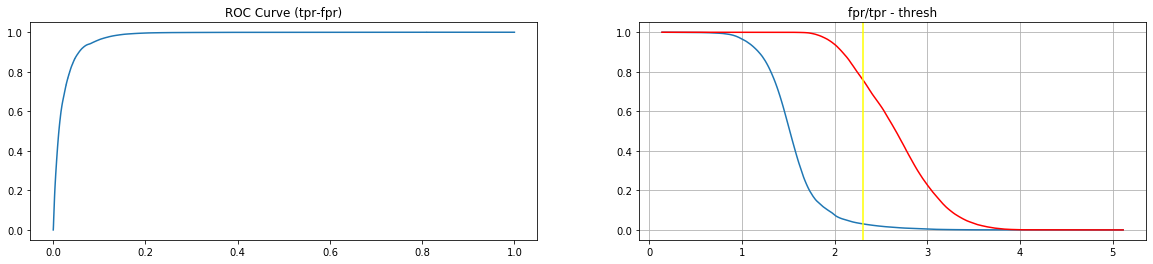

In [6]:
iad.visualize_eval_data(image_classifications_target, masks_target, image_scores, score_maps)

In [7]:
distributions_path = '../distributions/'
mean = torch.load(distributions_path+'bottle_mean.pt')
cov_inv = torch.load(distributions_path+'bottle_cov_inv.pt')

In [8]:
model = iad.Padim(backbone='resnet18', mean=mean, cov_inv=cov_inv, device=torch.device('cpu'))

In [9]:
res = model.evaluate(test_dataloader)
images, image_classifications_target, masks_target, image_scores, score_maps = res

Inference: 100%|██████████| 3/3 [00:09<00:00,  3.17s/it]


Image level
ROC-AUC score: 0.996031746031746

Optimal thresh: 16.869349
Recall: 1.0
Precision: 0.984375


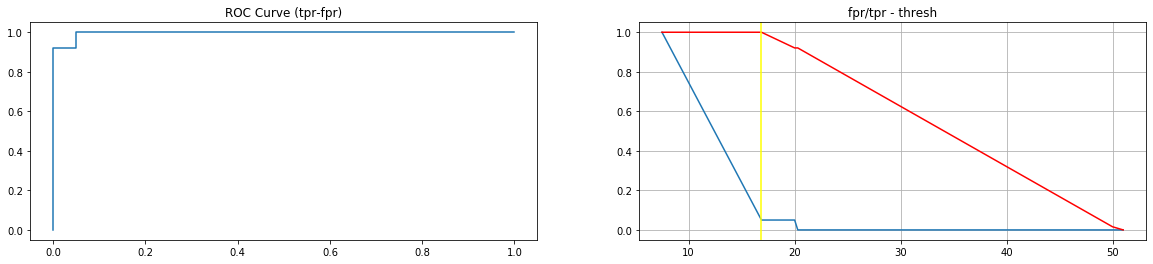

Pixel level
ROC-AUC score: 0.9840468286438052

Optimal thresh: 14.131464
Recall: 0.8013904657653216
Precision: 0.6387621997166169


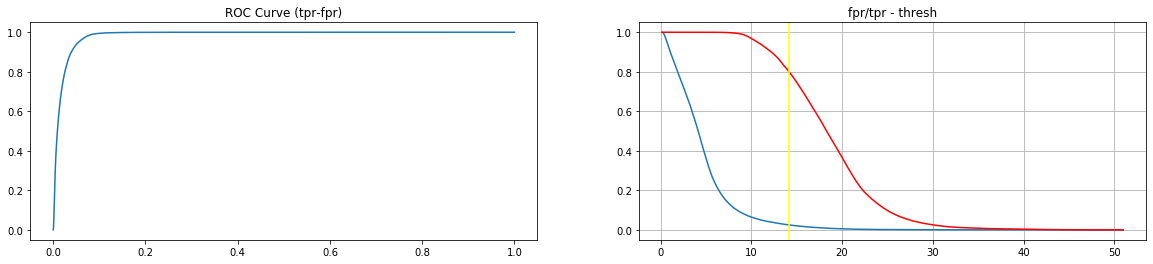

In [10]:
iad.visualize_eval_data(image_classifications_target, masks_target, image_scores, score_maps)